In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.cross_validation import train_test_split

In [2]:
train = pd.read_csv('./../Основы/train_mnist.csv')

In [3]:
!head train_mnist.csv

head: train_mnist.csv: No such file or directory


In [4]:
Y  = train['label'].values

In [5]:
train.shape

(42000, 785)

In [6]:
train.drop(['label'], axis=1, inplace=True)

In [7]:
X = train.values

In [8]:
X.shape   # 42 000 объектов по 748 признаков у каждого

(42000, 784)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [114]:
42000/2

21000.0

In [117]:
2**14

16384

In [118]:
clf = RandomForestClassifier(
    n_estimators=2000,
    max_depth=9,
    max_features='sqrt',
    verbose=1, 
    n_jobs=-1
)

In [119]:
clf.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.4min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [120]:
Y_pred = clf.predict(X_test)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    1.9s finished


In [121]:
print(classification_report(y_true=Y_test,y_pred=Y_pred,digits=5))
print(accuracy_score(y_true=Y_test,y_pred=Y_pred))

             precision    recall  f1-score   support

          0    0.98122   0.97664   0.97892       856
          1    0.95072   0.98197   0.96609       943
          2    0.93276   0.93966   0.93620       812
          3    0.93032   0.89319   0.91138       852
          4    0.94663   0.91862   0.93242       811
          5    0.94460   0.92038   0.93233       741
          6    0.95082   0.97949   0.96494       829
          7    0.95981   0.92168   0.94036       881
          8    0.92040   0.90465   0.91245       818
          9    0.85622   0.92415   0.88889       857

avg / total    0.93746   0.93679   0.93682      8400

0.9367857142857143


In [122]:
confusion_matrix(y_true=Y_test,y_pred=Y_pred)

array([[836,   0,   2,   1,   0,   1,   4,   0,  11,   1],
       [  0, 926,   4,   3,   2,   2,   1,   1,   4,   0],
       [  4,   4, 763,   9,   8,   0,   7,   9,   5,   3],
       [  0,   6,  20, 761,   2,  17,   4,  11,  15,  16],
       [  1,   3,   2,   0, 745,   2,   5,   1,   3,  49],
       [  5,   6,   2,  16,   3, 682,  13,   1,   7,   6],
       [  2,   1,   0,   0,   1,   8, 812,   0,   5,   0],
       [  1,   9,  16,   0,   7,   0,   0, 812,   5,  31],
       [  0,  15,   3,  15,   3,   6,   8,   1, 740,  27],
       [  3,   4,   6,  13,  16,   4,   0,  10,   9, 792]])

In [49]:
feature_importance = clf.feature_importances_

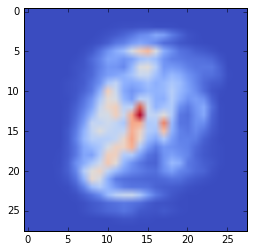

In [50]:
plt.figure()
plt.imshow(feature_importance.reshape(28,28), cmap='coolwarm')
plt.show()

In [123]:
pca=PCA(n_components=24)
X_train_pca = pca.fit_transform(X_train[:,feature_importance!=0])
X_test_pca = pca.transform(X_test[:,feature_importance!=0])

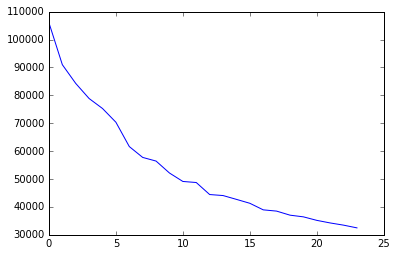

In [124]:
plt.figure()
plt.plot(pca.singular_values_)
plt.show()

In [65]:
_X_train = np.hstack([
    X_train[:,feature_importance!=0],
    X_train_pca
])
_X_test = np.hstack([
    X_test[:,feature_importance!=0],
    X_test_pca
])

In [68]:
clf2 = RandomForestClassifier(n_estimators=2000, max_depth=9, max_features='sqrt', verbose=1, n_jobs=-1)
clf2.fit(_X_train, Y_train)
_Y_predict = clf2.predict(_X_test)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.4min finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    1.6s finished


In [69]:
print(classification_report(y_true=Y_test,y_pred=_Y_predict, digits=5))
print(accuracy_score(y_true=Y_test,y_pred=Y_pred))

             precision    recall  f1-score   support

          0    0.98007   0.97664   0.97835       856
          1    0.96162   0.98303   0.97221       943
          2    0.93390   0.93966   0.93677       812
          3    0.92391   0.89789   0.91071       852
          4    0.95026   0.91862   0.93417       811
          5    0.93398   0.91633   0.92507       741
          6    0.95059   0.97467   0.96248       829
          7    0.96222   0.92509   0.94329       881
          8    0.91481   0.90587   0.91032       818
          9    0.85870   0.92182   0.88914       857

avg / total    0.93738   0.93679   0.93684      8400



In [74]:
X_train_nonzero = np.count_nonzero(X_train, axis=1)
X_test_nonzero = np.count_nonzero(X_test, axis=1)

In [79]:
from scipy.ndimage.filters import gaussian_filter

In [77]:
X_train.reshape(-1, 28,28).shape

(33600, 28, 28)

In [84]:
img = X_train[0].reshape( 28,28)

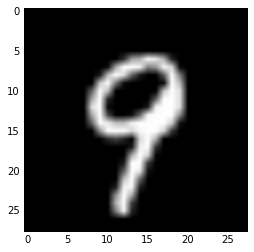

In [85]:
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

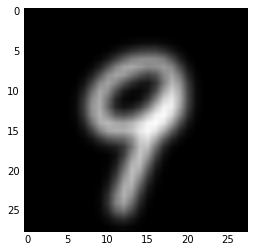

In [98]:
plt.figure()
plt.imshow(gaussian_filter(img, 1), cmap='gray')
plt.show()

In [99]:
X_train_blur = gaussian_filter(X_train.reshape(-1, 28,28), 2)
X_test_blur = gaussian_filter(X_test.reshape(-1, 28,28), 2)

In [100]:
X_train_blur = X_train_blur.reshape(-1, 28*28)
X_test_blur = X_test_blur.reshape(-1, 28*28)

In [101]:
clf2 = RandomForestClassifier(n_estimators=2000, max_depth=9, max_features='sqrt', verbose=1, n_jobs=-1)
clf2.fit(X_train_blur, Y_train)
_Y_predict = clf2.predict(X_test_blur )

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.9min finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    1.5s finished


In [102]:
print(classification_report(y_true=Y_test,y_pred=_Y_predict, digits=5))

             precision    recall  f1-score   support

          0    0.37621   0.54322   0.44455       856
          1    0.34604   0.48144   0.40266       943
          2    0.37313   0.40025   0.38622       812
          3    0.37756   0.32394   0.34870       852
          4    0.34737   0.32552   0.33609       811
          5    0.32486   0.15520   0.21005       741
          6    0.37887   0.42823   0.40204       829
          7    0.37216   0.40976   0.39006       881
          8    0.32037   0.21149   0.25479       818
          9    0.29028   0.23337   0.25873       857

avg / total    0.35098   0.35571   0.34598      8400



In [110]:
confusion_matrix(y_true=Y_test,y_pred=_Y_predict)

array([[465,  56,  40,  48,  27,  36,  49,  59,  39,  37],
       [ 63, 454,  92,  48,  38,  37,  59,  75,  33,  44],
       [ 80, 101, 325,  59,  42,   8,  84,  52,  41,  20],
       [108, 100,  78, 276,  32,  28,  54,  81,  45,  50],
       [ 66,  97,  38,  27, 264,  24,  73,  70,  46, 106],
       [113,  96,  41,  80,  60, 115,  79,  72,  41,  44],
       [ 97,  72,  73,  38,  63,  27, 355,  39,  32,  33],
       [ 81, 106,  56,  51,  54,  18,  29, 361,  41,  84],
       [ 81, 132,  68,  60,  58,  37,  84,  54, 173,  71],
       [ 82,  98,  60,  44, 122,  24,  71, 107,  49, 200]])

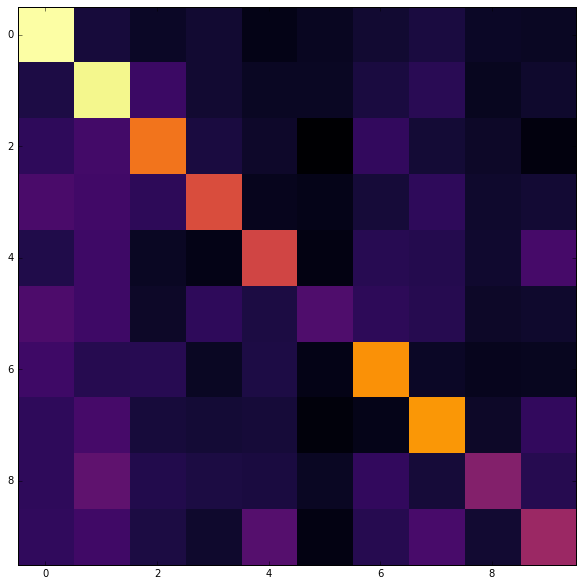

In [109]:
plt.figure(figsize=(10,10))
plt.imshow(confusion_matrix(y_true=Y_test,y_pred=_Y_predict), cmap='inferno', interpolation='nearest')
plt.show()

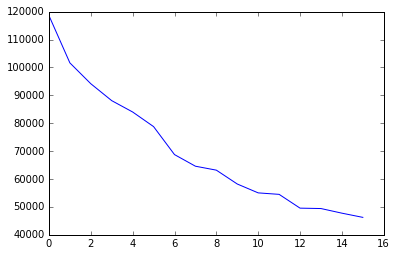

In [28]:
pca.components_.shape

(16, 784)

In [30]:
pca.components_[0].shape

(784,)

In [32]:
pca.components_[0].reshape(28,28).shape

(28, 28)

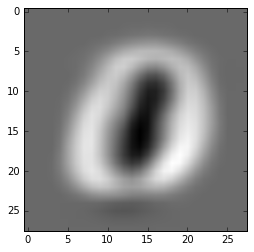

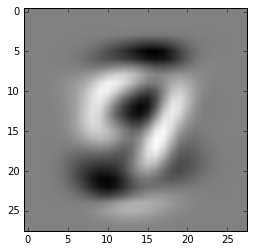

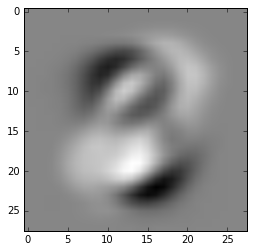

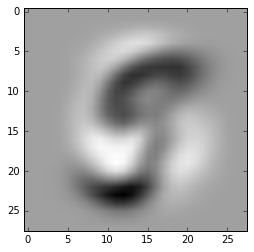

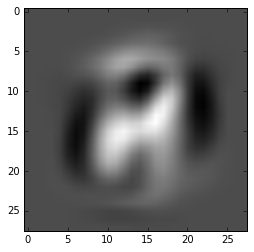

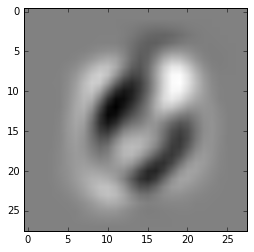

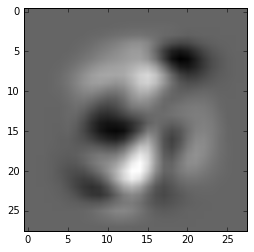

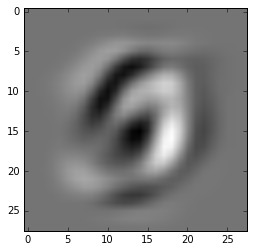

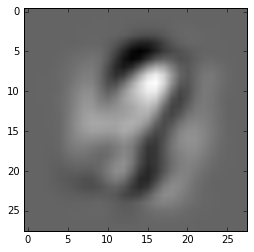

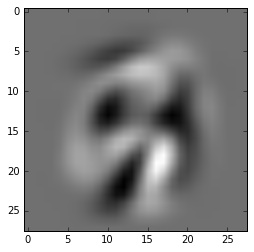

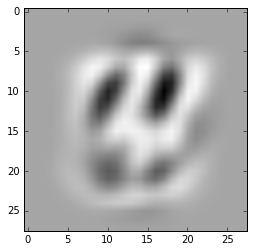

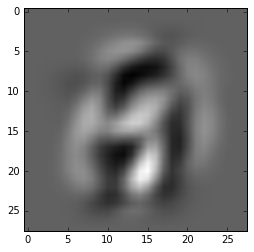

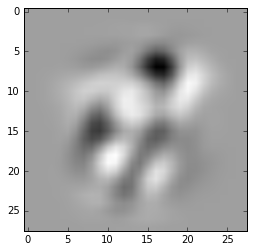

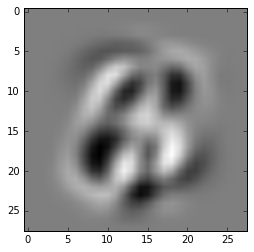

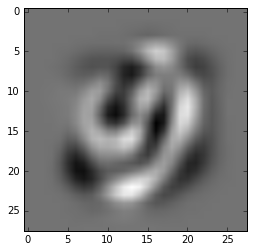

In [26]:
for i in range(15):
    plt.figure()
    plt.imshow(pca.components_[i].reshape(28,28), cmap='gray')
    plt.show()